In [109]:
import numpy as np
from scipy import special
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import matplotlib.colors

import coding
import overshadowing_ber
from overshadowing_ber import *

from tqdm import tqdm

import datetime

from matplotlib.colors import LogNorm

In [140]:
sns.set_theme(context="notebook", style="white")
new_rc = {
    'xtick.bottom': True,
    'xtick.minor.bottom': True,
    'xtick.minor.visible': True,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.minor.left': True,
    'ytick.minor.visible': True,
    'ytick.right': False,
    'grid.color': "#c0c0c0",
    'grid.linestyle': "-",
    'axes.grid': False,
}
plt.rcParams |= new_rc
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: .15
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: 12.0
axes.labelweight: normal
axes.linewidth: 1.25
axes.prop_cycle: cycler('color', [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313

In [2]:
# Set SNR range
EbN0dBs = np.arange(-5, 15, 0.1)

# Calculate theoretical B/M-PSK values
BPSK = lambda R: 0.5 * special.erfc(np.sqrt(R * 10**(EbN0dBs/10)))
PSK_M = lambda M, R: (1/np.log2(M))*special.erfc(np.sqrt(np.log2(M) * R * 10**(EbN0dBs/10))*np.sin(np.pi/M))

# Calculate the theoretical limit of max coding gain
shannon_limit = np.vectorize(lambda x: 0.5 if x < -1.6 else 0)(EbN0dBs)

In [55]:
# Run a Monte-Carlo simulation of BER of signal-to-victim ratio, in the absence of noise
EbN0dBs_svr = np.arange(-15, 45, 0.1)

N = int(1E4) # number of samples for each run
M = 4 # M-PSK

f = lambda x: 1/(10**(x/20))



qam16_unaligned_ber = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            16
        ),
        N,
        16
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished unaligned 16QAM")

qam16_aligned_ber = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset_aligned(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            16
        ),
        N,
        16
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned 16QAM")


qam64_unaligned_ber = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            64
        ),
        N,
        64
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished unaligned 64QAM")

qam64_aligned_ber = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset_aligned(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            64
        ),
        N,
        64
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned 64QAM")

qam256_unaligned_ber = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            256
        ),
        N,
        256
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished unaligned 256QAM")

qam256_aligned_ber = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset_aligned(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            256
        ),
        N,
        256
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned 256QAM")


bpsk_unaligned_ber = [
    run_simulation(
        lambda x: psk_offset(
            x,
            f(EbN0dB) # The victim-to-signal ratio, absolute units
        ),
        N,
        2
    )
    for EbN0dB in EbN0dBs_svr
]

print(f"{datetime.datetime.now()}: finished unaligned BPSK")

bpsk_aligned_ber = [
    run_simulation(
        lambda x: psk_offset_aligned(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            2
        ),
        N,
        2
    )
    for EbN0dB in EbN0dBs_svr
]

print(f"{datetime.datetime.now()}: finished aligned BPSK")

qpsk_unaligned_ber = [
    run_simulation(
        lambda x: psk_offset(
            x,
            f(EbN0dB) # The victim-to-signal ratio, absolute units
        ),
        N,
        M
    )
    for EbN0dB in EbN0dBs_svr
]

print(f"{datetime.datetime.now()}: finished unaligned QPSK")


qpsk_aligned_ber = [
    run_simulation(
        lambda x: psk_offset_aligned(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            M
        ),
        N,
        M
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned QPSK")


psk8_unaligned_ber = [
    run_simulation(
        lambda x: psk_offset(
            x,
            f(EbN0dB) # The victim-to-signal ratio, absolute units
        ),
        N,
        8
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished unaligned 8PSK")

psk8_aligned_ber = [
    run_simulation(
        lambda x: psk_offset_aligned(
            x,
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            8
        ),
        N,
        8
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned 8PSK")



2023-02-17 14:42:25.316460: finished unaligned 16QAM
2023-02-17 14:43:35.807930: finished aligned 16QAM
2023-02-17 14:45:29.457833: finished unaligned 64QAM
2023-02-17 14:47:13.804718: finished aligned 64QAM
2023-02-17 14:49:42.219874: finished unaligned 256QAM
2023-02-17 14:51:47.713215: finished aligned 256QAM
2023-02-17 14:54:38.472957: finished unaligned BPSK
2023-02-17 14:57:35.019974: finished aligned BPSK
2023-02-17 15:00:24.943788: finished unaligned QPSK
2023-02-17 15:03:41.235061: finished aligned QPSK
2023-02-17 15:06:01.628641: finished unaligned 8PSK
2023-02-17 15:09:16.971487: finished aligned 8PSK


In [56]:
# Run a Monte-Carlo simulation of BER of signal-to-victim ratio of QPSK, at the minimum possible Ev/N0
EbN0dBs_svr = np.arange(-15, 45, 0.1)

EvNodB_min = -1.6 # shannon limit
# Also take attacker to victim noise
# Need to calculate overall signal to noise

def calculate_combined_signal_to_noise(EaEvdB, EvN0dB):
    EaN0dB = EaEvdB + EvN0dB
    return 10 * np.log10(10**(EvN0dB/10) + 10**(EaN0dB/10))


N = int(1E4) # number of samples for each run
M = 4 # M-PSK

#f = lambda x: 1/(np.log10(x)*10)

f = lambda x: 1/(10**(x/20))




qam16_unaligned_ber_noise = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            16
        ),
        N,
        16
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished unaligned 16QAM")

qam16_aligned_ber_noise = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset_aligned(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            16
        ),
        N,
        16
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned 16QAM")


qam64_unaligned_ber_noise = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            64
        ),
        N,
        64
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished unaligned 64QAM")

qam64_aligned_ber_noise = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset_aligned(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            64
        ),
        N,
        64
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned 64QAM")

qam256_unaligned_ber_noise = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            256
        ),
        N,
        256
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished unaligned 256QAM")

qam256_aligned_ber_noise = [
    run_qam_simulation(
        lambda x: overshadowing_ber.qam_offset_aligned(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            256
        ),
        N,
        256
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned 256QAM")


#bpsk_unaligned_ber_noise = [
#    run_simulation(
#        lambda x: psk_offset(
#            x,
#            f(EbN0dB) # The victim-to-signal ratio, absolute units
#        ),
#        N,
#        2
#    )
#    for EbN0dB in EbN0dBs_svr
#]


bpsk_unaligned_ber_noise = [
    run_simulation(
        lambda x: psk_offset(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB) # The victim-to-signal ratio, absolute units
        ),
        N,
        2
    )
    for EbN0dB in EbN0dBs_svr
]

print(f"{datetime.datetime.now()}: finished unaligned BPSK")

bpsk_aligned_ber_noise = [
    run_simulation(
        lambda x: psk_offset_aligned(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            2
        ),
        N,
        2
    )
    for EbN0dB in EbN0dBs_svr
]

print(f"{datetime.datetime.now()}: finished aligned BPSK")

qpsk_unaligned_ber_noise = [
    run_simulation(
        lambda x: psk_offset(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB) # The victim-to-signal ratio, absolute units
        ),
        N,
        M
    )
    for EbN0dB in EbN0dBs_svr
]

print(f"{datetime.datetime.now()}: finished unaligned QPSK")


qpsk_aligned_ber_noise = [
    run_simulation(
        lambda x: psk_offset_aligned(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            M
        ),
        N,
        M
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned QPSK")


psk8_unaligned_ber_noise = [
    run_simulation(
        lambda x: psk_offset(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB) # The victim-to-signal ratio, absolute units
        ),
        N,
        8
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished unaligned 8PSK")

psk8_aligned_ber_noise = [
    run_simulation(
        lambda x: psk_offset_aligned(
            gaussian_offset(x, calculate_combined_signal_to_noise(EbN0dB, EvNodB_min), M),
            f(EbN0dB), # The victim-to-signal ratio, absolute units
            8
        ),
        N,
        8
    )
    for EbN0dB in EbN0dBs_svr
]
print(f"{datetime.datetime.now()}: finished aligned 8PSK")


2023-02-17 15:12:07.754899: finished unaligned 16QAM
2023-02-17 15:13:56.276461: finished aligned 16QAM
2023-02-17 15:16:12.612022: finished unaligned 64QAM
2023-02-17 15:17:44.523490: finished aligned 64QAM
2023-02-17 15:19:55.850749: finished unaligned 256QAM
2023-02-17 15:21:30.283173: finished aligned 256QAM
2023-02-17 15:23:37.912503: finished unaligned BPSK
2023-02-17 15:25:42.452856: finished aligned BPSK
2023-02-17 15:27:11.103347: finished unaligned QPSK
2023-02-17 15:28:49.872605: finished aligned QPSK
2023-02-17 15:30:13.274343: finished unaligned 8PSK
2023-02-17 15:32:21.064353: finished aligned 8PSK


In [198]:
cutoffs = [
    [
        EbN0dBs_svr[np.max(np.where(np.array(bpsk_unaligned_ber) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(qpsk_unaligned_ber) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(psk8_unaligned_ber) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(qam16_unaligned_ber) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(qam64_unaligned_ber) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(qam256_unaligned_ber) > 1e-6))],
    ],[
        EbN0dBs_svr[np.max(np.where(np.array(bpsk_unaligned_ber_noise) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(qpsk_unaligned_ber_noise) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(psk8_unaligned_ber_noise) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(qam16_unaligned_ber_noise) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(qam64_unaligned_ber_noise) > 1e-6))],
        EbN0dBs_svr[np.max(np.where(np.array(qam256_unaligned_ber_noise) > 1e-6))],
]]
print((" & ".join(["BPSK", "QPSK", "8-PSK", "16-QAM", "64-QAM", "256-QAM"])) + " \\\\")
for row in cutoffs:
    print((" & ".join([("%.2f" % elem) for elem in row])) + " \\\\")

#for name, clean, noise

BPSK & QPSK & 8-PSK & 16-QAM & 64-QAM & 256-QAM \\
-0.10 & 3.00 & 8.30 & 12.50 & 19.90 & 26.50 \\
9.40 & 13.30 & 18.60 & 22.30 & 28.20 & 36.50 \\


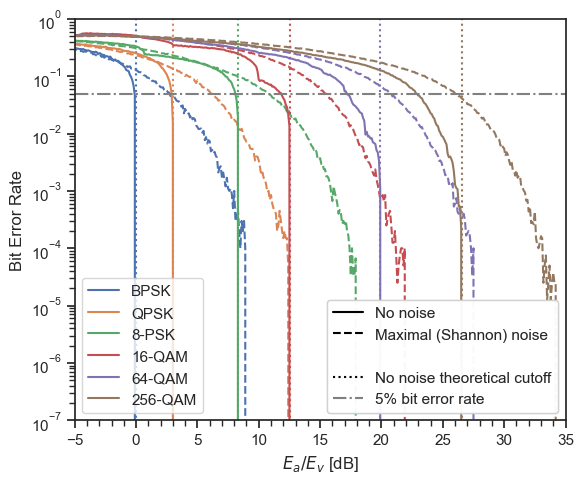

In [174]:
## TODO: this graph for QAM types (probably more interesting)
# This represents the limiting case, where noise is irrelevant

fig, axs = plt.subplots(1, 1, subplot_kw={"yscale": "log"}, figsize=(6,5))
plt.setp(axs, ylim=[1E-7, 1])
plt.setp(axs, xlim=[-5, 35])

def correct_floating_point(l):
    out = []
    zeroed = False
    for item in l:
        if zeroed:
            out.append(0)
        else:
            out.append(item)
            zeroed = item < 1E-6
    return out

colcycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
lines = []

lines.append(axs.plot(EbN0dBs_svr, bpsk_unaligned_ber, label="BPSK, zero noise", color=colcycle[0], linestyle="-")[0])
axs.plot(EbN0dBs_svr, correct_floating_point(bpsk_unaligned_ber_noise), label="BPSK, max noise", color=colcycle[0], linestyle="--")
axs.vlines(20*np.log10(2*(1)/(2)), 1E-9, 1, linestyles=":", color=colcycle[0])

lines.append(axs.plot(EbN0dBs_svr, qpsk_unaligned_ber, label="QPSK, zero noise", color=colcycle[1], linestyle="-")[0])
axs.plot(EbN0dBs_svr, correct_floating_point(qpsk_unaligned_ber_noise), label="QPSK, max noise", color=colcycle[1], linestyle="--")
axs.vlines(20*np.log10(2*(1)/(np.sqrt(2))), 1E-9, 1, linestyles=":", color=colcycle[1])

lines.append(axs.plot(EbN0dBs_svr, psk8_unaligned_ber, label="8-PSK, zero noise", color=colcycle[2], linestyle="-")[0])
axs.plot(EbN0dBs_svr, correct_floating_point(psk8_unaligned_ber_noise), label="8-PSK, max noise", color=colcycle[2], linestyle="--")
axs.vlines(20*np.log10(2*(1)/(2*np.sin(np.pi/8))), 1E-9, 1, linestyles=":", color=colcycle[2])

lines.append(axs.plot(EbN0dBs_svr, qam16_unaligned_ber, label="16-QAM, zero noise", color=colcycle[3], linestyle="-")[0])
axs.plot(EbN0dBs_svr, correct_floating_point(qam16_unaligned_ber_noise), label="16-QAM, max noise", color=colcycle[3], linestyle="--")
axs.vlines(20*np.log10(2*(1.5*np.sqrt(2))/(1)), 1E-9, 1, linestyles=":", color=colcycle[3])

lines.append(axs.plot(EbN0dBs_svr, qam64_unaligned_ber, label="64-QAM, zero noise", color=colcycle[4], linestyle="-")[0])
axs.plot(EbN0dBs_svr, correct_floating_point(qam64_unaligned_ber_noise), label="64-QAM, max noise", color=colcycle[4], linestyle="--")
axs.vlines(20*np.log10(2*(3.5*np.sqrt(2))/(1)), 1E-9, 1, linestyles=":", color=colcycle[4])

lines.append(axs.plot(EbN0dBs_svr, qam256_unaligned_ber, label="256-QAM, zero noise", color=colcycle[5], linestyle="-")[0])
axs.plot(EbN0dBs_svr, correct_floating_point(qam256_unaligned_ber_noise), label="256-QAM, max noise", color=colcycle[5], linestyle="--")
axs.vlines(20*np.log10(2*(7.5*np.sqrt(2))/(1)), 1E-9, 1, linestyles=":", color=colcycle[5])


lines2 = []
lines2.append(plt.plot([np.NaN], linestyle="-", color="black")[0])
lines2.append(plt.plot([np.NaN], linestyle="--", color="black")[0])
lines2.append(plt.plot([np.NaN], linestyle="-", color="black", alpha=0.0)[0])
lines2.append(plt.plot([np.NaN], linestyle=":", color="black")[0])
lines2.append(plt.plot([-5, 35], [0.05, 0.05], linestyle="-.", color="grey")[0])

legends = []
legends.append(axs.legend(lines, ["BPSK", "QPSK", "8-PSK", "16-QAM", "64-QAM", "256-QAM"], loc="lower left"))
legends.append(axs.legend(lines2, ["No noise", "Maximal (Shannon) noise", "", "No noise theoretical cutoff", "5% bit error rate"], loc="lower right"))
for legend in legends:
    axs.add_artist(legend)

plt.xlabel('$E_a/E_v$ [dB]')
plt.ylabel('Bit Error Rate')
plt.tight_layout()

plt.savefig("protocol_noise_limits_ber.pdf", bbox_inches='tight')
plt.show()



# Take home:
# * for BPSK, if the attacker is even slightly louder than the victim then their signal is decoded
# * For QPSK, if the attacker is phase aligned then they only have to be slightly louder
#   but if not phase aligned, then they must be nearly a full db louder to have any effect


# Summary:
# This is the case where the victim signal is otherwise being received perfectly
# * in the absence of noise, theres essentially a perfect threshold where the attacker succeeds, anb

# * it's much easier to overshadow BPSK than the others
# * interestingly, overshadowing BPSK is(very marginlly) when unaligned easier



In [94]:
# Bit errors for PSK
# Calculate attacker-to-victim ratio against victim-to-noise ratio, with each point being coloured according to bit error rate

# Values of victim-to-noise and attacker-to-victim to range over
EvN0dBs = np.arange(0, 30.1, 1)
EaEvdBs = np.arange(-2, 12.1, 0.25)
grid_plot_extent = [0-1/2,30+1/2,-2-0.25/2,12+0.25/2]

Ms = [4] # M-PSK
N = int(5E3) # number of samples for each run

psk_EaEvNo_results = {}

for M in Ms:
    # calculate bit error rate, unaligned in phase
    bers = []
    for EaEvdB in EaEvdBs:
        bers_inner = []
        a = 1/(10**(EaEvdB/20))
        for EvN0dB in EvN0dBs:
            EaN0dB = EvN0dB + EaEvdB
            ber = run_simulation(
                lambda x:
                    psk_offset(
                        gaussian_offset(x, EaN0dB, M),
                        a
                    ),
                    N, M)
            bers_inner.append(ber)
        bers.append(bers_inner)
        
    print(f"{datetime.datetime.now()}: finished calculating {M}-PSK unaligned")
    # calculate bit error rate, aligned in phase

    aligned_bers = []
    for EaEvdB in EaEvdBs:
        bers_inner = []
        a = 1/(10**(EaEvdB/20))
        for EvN0dB in EvN0dBs:
            EaN0dB = EvN0dB + EaEvdB
            ber = run_simulation(
                lambda x:
                    psk_offset_aligned(
                        gaussian_offset(x, EaN0dB, M),
                        a,
                        M
                    ),
                    N, M)
            bers_inner.append(ber)
        aligned_bers.append(bers_inner)
    
    print(f"{datetime.datetime.now()}: finished calculating {M}-PSK aligned")

    psk_EaEvNo_results[M] = {"aligned_bers": aligned_bers, "unaligned_bers": bers}

2023-02-17 16:36:54.613632: finished calculating 4-PSK unaligned
2023-02-17 16:39:19.950820: finished calculating 4-PSK aligned


In [95]:
# Apply bit error rate thresholds for PSK

# This is a dumb and inefficient way of doing this
# A much better approach would not calculate the redundant values that don't make the cut

# TODO: calculate these values based on the required packer error rate
thresholds = [0.001, 0.1]

threshold_psk_EaEvNo_results = {}

for threshold in thresholds:
    inner_dict = {}
    for M, d in psk_EaEvNo_results.items():
        aligned_bers = d["aligned_bers"]
        unaligned_bers = d["unaligned_bers"]

        # calculate aligned ber thresholded
        aligned_threshold_bers = []
        for row in aligned_bers:
            # Find the first place in the row where the value falls below the threshold
            index = None
            for i, ber in enumerate(row):
                if ber < threshold:
                    index = i
                    break

            #EvNodB = np.inf if index is None else EvN0dBs[index]
            EvNodB = 30 if index is None else EvN0dBs[index] # spline calculation doesn't like np.inf
            aligned_threshold_bers.append(EvNodB)
            
        # calculate unaligned ber thresholded
        unaligned_threshold_bers = []
        for row in unaligned_bers:
            # Find the first place in the row where the value falls below the threshold
            index = None
            for i, ber in enumerate(row):
                if ber < threshold:
                    index = i
                    break

            #EvNodB = np.inf if index is None else EvN0dBs[index]
            EvNodB = 30 if index is None else EvN0dBs[index] # spline calculation doesn't like np.inf
            unaligned_threshold_bers.append(EvNodB)
            
        inner_dict[M] = {"aligned_bers": aligned_threshold_bers, "unaligned_bers": unaligned_threshold_bers}
    threshold_psk_EaEvNo_results[threshold] = inner_dict

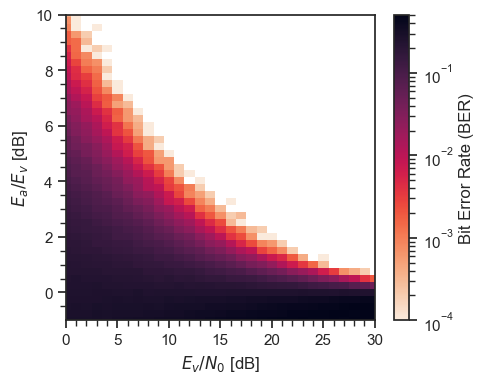

In [176]:
plt.figure(figsize=(5,4))
plt.imshow(psk_EaEvNo_results[4]["aligned_bers"], cmap=sns.cm.rocket_r, extent=grid_plot_extent, origin="lower", aspect="auto", norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.set_label("Bit Error Rate (BER)")
#ax = sns.heatmap(, linewidth=0.5, xticklabels=EvN0dBs, yticklabels=EaEvdBs, )
#norm=LogNorm(), 
#plt.title("Bit error rate, aligned QPSK")
plt.xlabel('$E_v/N_0$ [dB]')
plt.ylabel('$E_a/E_v$ [dB]')
plt.xlim(0, 30)
plt.ylim(-1, 10)
#plt.xlim(0, 5)
#plt.ylim(8, 9)

plt.tight_layout()

plt.savefig("noisy_attack_qpsk_aligned.pdf", bbox_inches='tight')

plt.show()

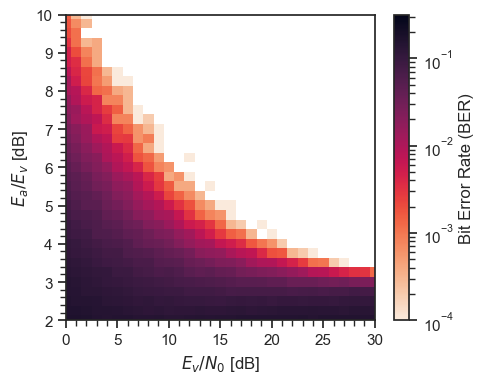

In [177]:
plt.figure(figsize=(5,4))
plt.imshow(psk_EaEvNo_results[4]["unaligned_bers"], cmap=sns.cm.rocket_r, extent=grid_plot_extent, origin="lower", aspect="auto", norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.set_label("Bit Error Rate (BER)")
#ax = sns.heatmap(, linewidth=0.5, xticklabels=EvN0dBs, yticklabels=EaEvdBs, )
#norm=LogNorm(), 
#plt.title("Bit error rate, unaligned QPSK")
plt.xlabel('$E_v/N_0$ [dB]')
plt.ylabel('$E_a/E_v$ [dB]')
plt.xlim(0, 30)
plt.ylim(2, 10)

plt.tight_layout()

plt.savefig("noisy_attack_qpsk_unaligned.pdf", bbox_inches='tight')

plt.show()

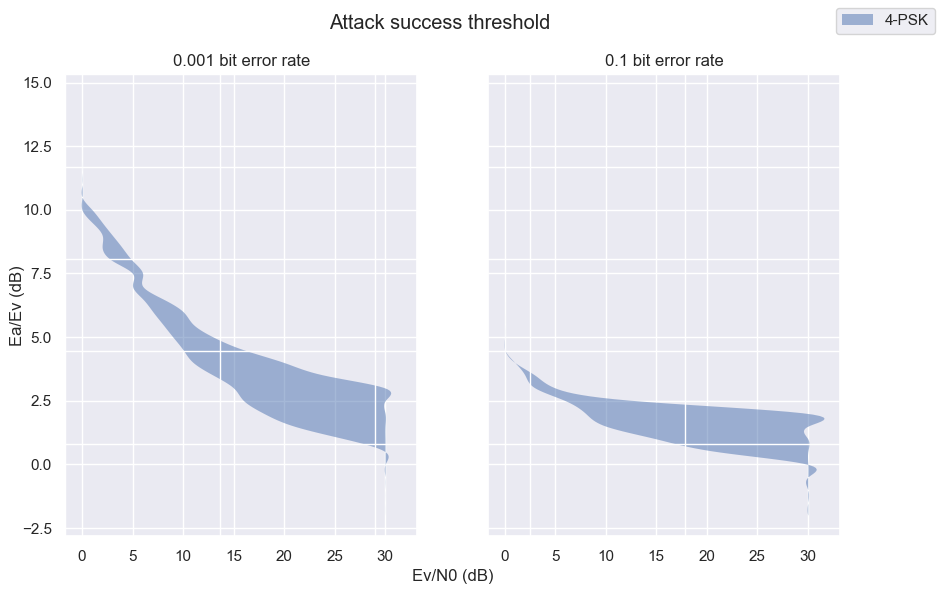

In [73]:
# Plot the PSK graphs for each threshold

# TODO: apply some smoothing

xnew = np.linspace(EaEvdBs.min(), EaEvdBs.max(), 300)

fig, axs = plt.subplots(1, len(threshold_psk_EaEvNo_results), sharex=True, sharey=True, figsize=(10,6))

for i, (threshold, d) in enumerate(threshold_psk_EaEvNo_results.items()):
    for M, d2 in d.items():
        ax = axs if len(threshold_psk_EaEvNo_results) == 1 else axs[i]
        unaligned_bers_f = make_interp_spline(EaEvdBs, d2["unaligned_bers"], k=3) # type: BSpline object
        
        unaligned_bers = unaligned_bers_f(xnew)
        aligned_bers = make_interp_spline(EaEvdBs, d2["aligned_bers"], k=3)(xnew)
        ax.set_title(f"{threshold} bit error rate")
        ax.fill_betweenx(xnew, unaligned_bers, aligned_bers, alpha=.5, linewidth=0, label=f"{M}-PSK")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels)

fig.add_subplot(frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Ev/N0 (dB)')
plt.ylabel('Ea/Ev (dB)')
fig.suptitle("Attack success threshold")


plt.show()

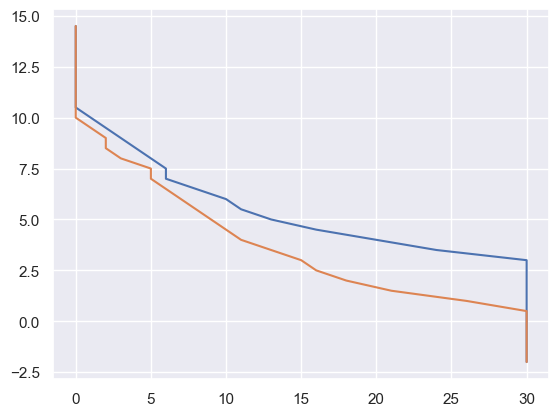

In [74]:
plt.plot(threshold_psk_EaEvNo_results[0.001][4]["unaligned_bers"], EaEvdBs)
plt.plot(threshold_psk_EaEvNo_results[0.001][4]["aligned_bers"], EaEvdBs)
plt.show()

-0.10000000000005294


In [76]:
# TODO: this graph for the spreadsheeted satellite systems

# TODO: add bandwidth for Table 1 in paper

# Table of receiver systems

# bit error rate against received gain for real-world satellite systems, with and without coding gain

# Inputs:
# * victim_received_power (Pv) - received victim signal power (dBW)
# * Eb/N0 - energy per bit to noise power spectral density ratio (determined from victim + attacker + receiver noise)

# Scale over:
# * Pa - received attacker signal power (Watts)

# Calculate:
# Ev - victim signal energy per bit - joules (watt-seconds)
# Ea - attacker signal energy per bit - joules (watt-seconds)
# Ea/Ev - attacker-to-victim signal ratio (dB)

cadu_rs = np.vectorize(lambda ber : coding.rs_bit_error_rate(ber, data_length=1020, parity_length=128, interleave_depth=4))

# Terra/Aqua constants
victim_raw_received_power = -151.8 # dBW
data_rate = 13.125E6
M = 4

# EOS standard ground station constants https://corpora.tika.apache.org/base/docs/govdocs1/391/391506.pdf
ground_station_antenna_gain = 45.60 # dBi
ground_station_lnb_temperature = 155.0 # K   # might get significantly more noisy due to rain, we assume clear skies

# global constants
boltzmann_constant_dB = -228.60 # dBW/Hz/K (includes bandwidth)

# variables
attacker_received_powers = np.arange(-150, -80, 1) # dBW


# calculations
victim_received_power = victim_raw_received_power + ground_station_antenna_gain
print(f"victim_received_power: {victim_received_power}") # - 106
#victim_received_power = -121.14 # why is this so off? - this is a maximum, based on unrealistic constraints of the transmit antenna
# a more realistic maximum received power would be -118.56dBW, from the table

noise_temp_dB = np.log10(ground_station_lnb_temperature)*10
print(f"noise_temp_dB: {noise_temp_dB}")
victim_carrier_to_noise_density_ratio = victim_received_power - noise_temp_dB - boltzmann_constant_dB
print(f"victim_carrier_to_noise_density_ratio: {victim_carrier_to_noise_density_ratio}")

symbols_to_bits = 10*np.log10(data_rate) # TODO: why not /10?

# Calculate the victim signal to received noise ratio
EvN0dB = victim_carrier_to_noise_density_ratio - symbols_to_bits # TODO: I ignored the I/Q channel power split loss

print(f"EvN0dB: {EvN0dB}")

# Vary over
# attacker_raw_received_power = attacker_eirp - attacker_path_loss

EaEvs = attacker_received_powers - victim_received_power

# Calculate the bit error rate

N = int(1E4)

print("bers")

# TODO: vary this over noise level


bers = []
for attacker_received_power_dB in attacker_received_powers:
    EaEvdB = attacker_received_power_dB - victim_received_power
    a = 1/(10**(EaEvdB/20))
    overall_received_power = 10 * np.log10(10**(victim_received_power/10) + 10**(attacker_received_power_dB/10))
    EbN0dB = overall_received_power - noise_temp_dB - boltzmann_constant_dB - symbols_to_bits
    
    #print(f"EaEvdB: {EaEvdB}")
    #print(f"a: {a}")
    #print(f"overall_received_power: {overall_received_power}")
    #print(f"EbN0dB: {EbN0dB}")
    
    ber = run_simulation(
        lambda x:
            gaussian_offset(
                psk_offset(x, a),
                EbN0dB,
                M
            ),
        N,
        M
    )
    
    print(ber)
    bers.append(ber)
bers2 = cadu_rs(bers)

    
# TODO: introduce coding gain
        
# reasonable assumptions: thermal noise + 2-3 extra dB

victim_received_power: -106.20000000000002
noise_temp_dB: 21.903316981702915
victim_carrier_to_noise_density_ratio: 100.49668301829706
EvN0dB: 29.315689897517117
bers
0.4996
0.5015
0.5021
0.50115
0.49745
0.508
0.49595
0.49035
0.50075
0.48945
0.48825
0.491
0.49345
0.4909
0.4971
0.48955
0.4817
0.4926
0.4866
0.49315
0.48945
0.48235
0.47785
0.4775
0.47225
0.47045
0.46715
0.4639
0.46665
0.4581
0.44475
0.44835
0.4454
0.4359
0.42855
0.41875
0.40905
0.3941
0.38395
0.36725
0.3507
0.32845
0.3003
0.27215
0.2422
0.20145
0.1306
0.0018
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
block length: 287.0
corruptible_symbols: 16
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
block correct rate: 0.0
block length: 287.0
corruptible_symbols: 16
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
block correct rate: 0.0
block length: 287.0
corruptible_symbols: 16
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

c:\Users\maraly\OX\SSLF-downlink\overshadow_factor\theoretical\coding.py:58: RuntimeWarning: invalid value encountered in double_scalars
  "improvement rate": ber/equivalent_ber
c:\Users\maraly\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2411: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


victim_received_power: -106.20000000000002


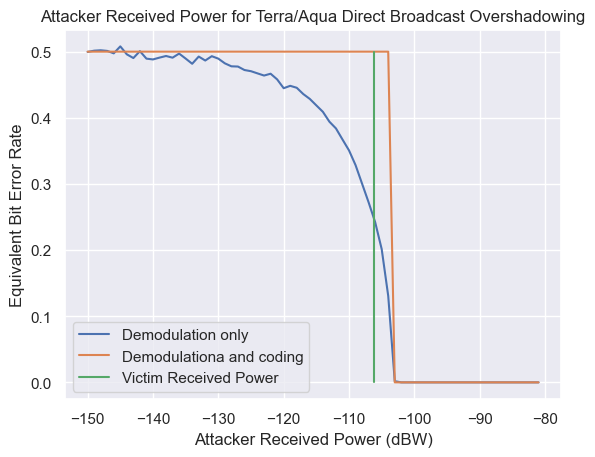

In [77]:
sync_word_size = 8

fig, axs = plt.subplots(1, 1)
#plt.setp(axs, ylim=[1E-9, 0.6])
#plt.setp(axs, xlim=[-5, 15])

axs.title.set_text("Attacker Received Power for Terra/Aqua Direct Broadcast Overshadowing")

axs.plot(attacker_received_powers, bers, label="Demodulation only")
axs.plot(attacker_received_powers, bers2, label="Demodulationa and coding")

#axs.plot(EbN0dBs, shannon_limit, label="Theoretical Shannon limit")

# plot the victim received power floor
print(f"victim_received_power: {victim_received_power}")
axs.plot([victim_received_power, victim_received_power], [0.5, 0], label = "Victim Received Power")


# plot the noise floor


axs.legend()
plt.ylabel('Equivalent Bit Error Rate') # Alternatively consider packet error rate
plt.xlabel('Attacker Received Power (dBW)')
plt.savefig("terra_aqua_attacker_power.pdf", bbox_inches='tight')
plt.show()

test
test
test
test
test
test


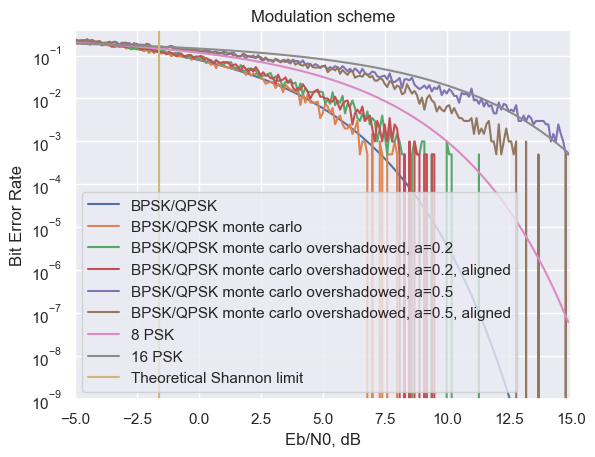

In [78]:
rs_test_v = np.vectorize(lambda ber : coding.rs_bit_error_rate(ber, data_length=4, parity_length=3, interleave_depth=1, symbol_size=1))
cadu_rs = np.vectorize(lambda ber : coding.rs_bit_error_rate(ber, data_length=1020, parity_length=128, interleave_depth=4)) # This is the wrong interleave_depth
ccsds_8_rs = np.vectorize(lambda ber : coding.rs_bit_error_rate(ber, data_length=239*5, parity_length=8*5, interleave_depth=5))
ccsds_16_rs = np.vectorize(lambda ber : coding.rs_bit_error_rate(ber, data_length=223*5, parity_length=32*5, interleave_depth=5))
hamming_v = np.vectorize(coding.hamming_7_4)

# Run a Monte-Carlo simulation of BER of QPSK
N = int(1E3) # number of samples for each run
M = 4 # M-PSK

# Run monte carlo of bit aligned

print("test")

bers = [run_simulation(lambda x: gaussian_offset(x, EbN0dB, M), N, M) for EbN0dB in EbN0dBs]
print("test")

bers_overshadowed_02 = [run_simulation(
            lambda x:
                psk_offset(
                    gaussian_offset(x, EbN0dB, M),
                    0.2
                ),
                N, M)
        for EbN0dB in EbN0dBs]
print("test")

bers_overshadowed_02_aligned = [run_simulation(
            lambda x:
                psk_offset_aligned(
                    gaussian_offset(x, EbN0dB, M),
                    0.2,
                    M
                ),
                N, M)
        for EbN0dB in EbN0dBs]

print("test")

bers_overshadowed_05 = [run_simulation(
            lambda x:
                psk_offset(
                    gaussian_offset(x, EbN0dB, M),
                    0.5
                ),
                N, M)
        for EbN0dB in EbN0dBs]
print("test")

bers_overshadowed_05_aligned = [run_simulation(
            lambda x:
                psk_offset_aligned(
                    gaussian_offset(x, EbN0dB, M),
                    0.5,
                    M
                ),
                N, M)
        for EbN0dB in EbN0dBs]
print("test")


#bers_overshadowed_07 = [run_simulation(
#            lambda x:
#                psk_offset(
#                    gaussian_offset(x, EbN0dB, M),
#                    0.7
#                ),
#                N, M)
#        for EbN0dB in EbN0dBs]
#
#
#bers_overshadowed_1 = [run_simulation(
#            lambda x:
#                psk_offset(
#                    gaussian_offset(x, EbN0dB, M),
#                    1
#                ),
#                N, M)
#        for EbN0dB in EbN0dBs]



# Plot the graphs
# TODO: plot QAM

fig, axs = plt.subplots(1, 1, subplot_kw={"yscale": "log"})
plt.setp(axs, ylim=[1E-9, 0.4])
plt.setp(axs, xlim=[-5, 15])

axs.title.set_text("Modulation scheme")

axs.plot(EbN0dBs, BPSK(1), label="BPSK/QPSK")
axs.plot(EbN0dBs, bers, label="BPSK/QPSK monte carlo")
axs.plot(EbN0dBs, bers_overshadowed_02, label="BPSK/QPSK monte carlo overshadowed, a=0.2")
axs.plot(EbN0dBs, bers_overshadowed_02_aligned, label="BPSK/QPSK monte carlo overshadowed, a=0.2, aligned")
axs.plot(EbN0dBs, bers_overshadowed_05, label="BPSK/QPSK monte carlo overshadowed, a=0.5")
axs.plot(EbN0dBs, bers_overshadowed_05_aligned, label="BPSK/QPSK monte carlo overshadowed, a=0.5, aligned")
#axs.plot(EbN0dBs, bers_overshadowed_07, label="BPSK/QPSK monte carlo overshadowed, a=0.7")
#axs.plot(EbN0dBs, bers_overshadowed_1, label="BPSK/QPSK monte carlo overshadowed, a=1")
axs.plot(EbN0dBs, PSK_M(8, 1), label="8 PSK")
axs.plot(EbN0dBs, PSK_M(16, 1), label="16 PSK")

# TODO: FSK, QAM

# Commented out: combinations of modulation with coding schemes
# We'll plot some of them

#axs.plot(EbN0dBs, rs_test_v(BPSK(4/7)), label="(7,4) Hamming code, hard decisions")
#axs.plot(np.vectorize(coding.soft_decoding_bonus)(EbN0dBs), rs_test_v(BPSK(4/7)), label="(7,4) Hamming code, soft decisions")
#axs.plot(EbN0dBs, cadu_rs(BPSK(223/255)), label="CADU Reed-Solomon, hard decisions")
#axs.plot(coding.soft_decoding_bonus(EbN0dBs), cadu_rs(BPSK(223/255)), label="CADU Reed-Solomon, soft decisions")
#axs.plot(EbN0dBs, ccsds_8_rs(BPSK(239/255)), label="CCSDS E=8 Reed-Solomon")
#axs.plot(EbN0dBs, ccsds_16_rs(BPSK(223/255)), label="CCSDS E=16 Reed-Solomon")
#axs.plot(EbN0dBs, coding.conv_error_rate(BPSK, 1, 2), label = "CC Rate 1/2")
#axs.plot(EbN0dBs, coding.conv_error_rate(BPSK, 3, 4), label = "CC Rate 3/4")
#axs.plot(EbN0dBs, coding.conv_error_rate(BPSK, 7, 8), label = "CC Rate 7/8")

#axs.plot(EbN0dBs, ccsds_16_rs(coding.conv_error_rate(BPSK, 1, 2)), label = "RS & CC Rate 1/2")
#axs.plot(EbN0dBs, ccsds_16_rs(coding.conv_error_rate(BPSK, 3, 4)), label = "RS & CC Rate 3/4")
#axs.plot(EbN0dBs, ccsds_16_rs(coding.conv_error_rate(BPSK, 7, 8)), label = "RS & CC Rate 7/8")

axs.plot(EbN0dBs, shannon_limit, label="Theoretical Shannon limit")

#axs[1].title.set_text("8-PSK")
#axs[1].plot(EbN0dBs, PSK_M(8, 1), label="No coding")
#axs[1].plot(EbN0dBs, rs_test_v(PSK_M(8, 4/7)), label="(7,4) Hamming code, hard decisions")
#axs[1].plot(np.vectorize(coding.soft_decoding_bonus)(EbN0dBs), rs_test_v(PSK_M(8, 4/7)), label="(7,4) Hamming code, soft decisions")
#axs[1].plot(EbN0dBs, cadu_rs(PSK_M(8, 223/255)), label="CADU Reed-Solomon, hard decisions")
#axs[1].plot(coding.soft_decoding_bonus(EbN0dBs), cadu_rs(PSK_M(8, 223/255)), label="CADU Reed-Solomon, soft decisions")
#axs[1].plot(EbN0dBs, ccsds_8_rs(PSK_M(8, 239/255)), label="CCSDS E=8 Reed-Solomon")
#axs[1].plot(EbN0dBs, ccsds_16_rs(PSK_M(8, 223/255)), label="CCSDS E=16 Reed-Solomon")
#axs[1].plot(EbN0dBs, shannon_limit, label="Theoretical Shannon limit")

axs.legend()
plt.xlabel('Eb/N0, dB')
plt.ylabel('Bit Error Rate')
plt.show()

In [178]:
import dill
dill.dump_session('notebook_env.db')

-0.10000000000005294
